In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [12]:
BASE_DIR = os.getcwd()

In [13]:
"""
I went to build synthatic dataset based on some assumptions

I have the following variables:
1. Tempreture
2. Humidity
3. Nutretions
4. Time (in hours) (Since planet) #When the lattus is been planted
5. Time (in Dayes) (Since planet) #When the lattus is been planted
6. Seed possibility of grouth (Static Value i.e 90%)
7. Light Exposure lux
8. Commulitive Lattuse Grouth percentage

Scope:
I went to build synthatic dataset based on some assumptions to make model that predict the lattuse growth based on the above variables.

Assumptions:
1. The optimal values mean fast lattuse growth 
2. Nutretions are proportional to the lattuse growth (have strong correlation).
3. Time is directly proportional to the lattuse growth.
4. Seed possibility of grouth is define the ratio of the lattus that it'll grow.
5. There are optimal values of temperature, humidity, nutretions, time and seed possibility of grouth if it is happend it will grow faster
6. The minimum value of Time in dayes when lattues grouth = 100% is 45 days and maximum is 50
7. If Seed possibility of grouth = 90% so 90% of seeds will survive and 10% will not grow.
8. Seed possibility of grouth is a static value in all data because a bunch of seeds have same Seed possibility of grouth and this value is defined by supplier
9. Tempreture is Inversely proportional to humidity (Having negitive correlation)
10. Humedity is indirectly proportional to the Nutretions (Having positive correlation)
11. Minimum Tempreture is 11 Celsius
12. Maximum Tempreture is 45 Celsius
13. Minimum Humidity is 35%
14. Maximum Humidity is 85%
15. Minimum Nutretions is 0
16. Maximum Nutretions is 4
17. Mean of netretions is 2
18. Standerd Deviation of netretions is 1.3
19. Light Exposure lux have strong correlation with the lattuse growth
20. Minimum Light Exposure lux is 600 (Night)
21. Maximum Light Exposure lux is 120000 (Day).
22. Light exposure lux change contenusly with time (day and night). (Change happen gradually)
23. Light Exposure lux have strong correlation with the tempreture, humedity.




Additional Requirements:
1. Data must be noisy
2. With minimum values of Tempreture, Humidity, Nutretions, Grouth must be slower or even must be no grouth
"""



"\nI went to build synthatic dataset based on some assumptions\n\nI have the following variables:\n1. Tempreture\n2. Humidity\n3. Nutretions\n4. Time (in hours) (Since planet) #When the lattus is been planted\n5. Time (in Dayes) (Since planet) #When the lattus is been planted\n6. Seed possibility of grouth (Static Value i.e 90%)\n7. Light Exposure lux\n8. Commulitive Lattuse Grouth percentage\n\nScope:\nI went to build synthatic dataset based on some assumptions to make model that predict the lattuse growth based on the above variables.\n\nAssumptions:\n1. The optimal values mean fast lattuse growth \n2. Nutretions are proportional to the lattuse growth (have strong correlation).\n3. Time is directly proportional to the lattuse growth.\n4. Seed possibility of grouth is define the ratio of the lattus that it'll grow.\n5. There are optimal values of temperature, humidity, nutretions, time and seed possibility of grouth if it is happend it will grow faster\n6. The minimum value of Time in

In [14]:

# Set the number of data points to generate
num_points = 10000

# Generate random time values (in hours since planting)
time_hours = np.random.randint(0, 24 * 50, size=num_points)

# Generate random time values (in days since planting)
time_days = time_hours // 24

# Set the seed possibility of growth (static value)
seed_possibility = 0.9

# Generate random light exposure lux values based on time (day and night)
light_exposure = np.where(time_hours % 24 < 12, np.random.randint(600, 120000, size=num_points), np.random.randint(600, 10000, size=num_points))

# Generate random temperature values based on light exposure
temperature = np.random.normal(loc=28, scale=5, size=num_points)
temperature = np.clip(temperature, 11, 45)
temperature += np.random.normal(loc=0, scale=1, size=num_points)  # Add noise

# Generate random humidity values based on temperature
humidity = 100 - (temperature - 11) * (50 / 34)
humidity = np.clip(humidity, 35, 85)
humidity += np.random.normal(loc=0, scale=2, size=num_points)  # Add noise

# Generate random nutrition values
nutrition = np.random.normal(loc=2, scale=1.3, size=num_points)
nutrition = np.clip(nutrition, 0, 4)
nutrition += np.random.normal(loc=0, scale=0.2, size=num_points)  # Add noise

# Calculate the cumulative lettuce growth percentage
growth_rate = (nutrition / 4) * (time_days / 50)
growth_rate *= (temperature >= 11) & (temperature <= 45) & (humidity >= 35) & (humidity <= 85)
growth_rate *= (light_exposure >= 600) & (light_exposure <= 120000)
growth_rate *= 2.8
cumulative_growth = np.minimum(growth_rate * 100, 100)
cumulative_growth += np.random.normal(loc=0, scale=2, size=num_points)  # Add noise
cumulative_growth = np.clip(cumulative_growth, 0, 100)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Nutrition': nutrition,
    'Time (hours since planting)': time_hours,
    'Time (days since planting)': time_days,
    'Seed Possibility of Growth': seed_possibility,
    'Light Exposure (lux)': light_exposure,
    'Cumulative Lettuce Growth': cumulative_growth
})


# Print the generated dataset

data.to_csv(BASE_DIR + '/synthetic_lettuce_growth_data.csv', index=False)
df = pd.read_csv(BASE_DIR + '/synthetic_lettuce_growth_data.csv')

In [15]:
df.head()

Temperature  Humidity   Nutrition  Time (hours since planting)  \
0   28.217467   75.735504  2.398870               641               
1   37.847541   63.442377  1.323527              1059               
2   22.326297   84.482088  1.398111              1192               
3   35.487713   65.388355  3.243893              1092               
4   24.554613   78.146360  2.166326               919               

   Time (days since planting)  Seed Possibility of Growth  \
0              26                          0.9              
1              44                          0.9              
2              49                          0.9              
3              45                          0.9              
4              38                          0.9              

   Light Exposure (lux)  Cumulative Lettuce Growth  
0           6340                 85.138476          
1         101746                 78.269652          
2           1187                 93.642581          
3            898                 98.693898          
4          49730                 96.149410

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    7 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Seed Possibility of Growth']

################ Regression problem #

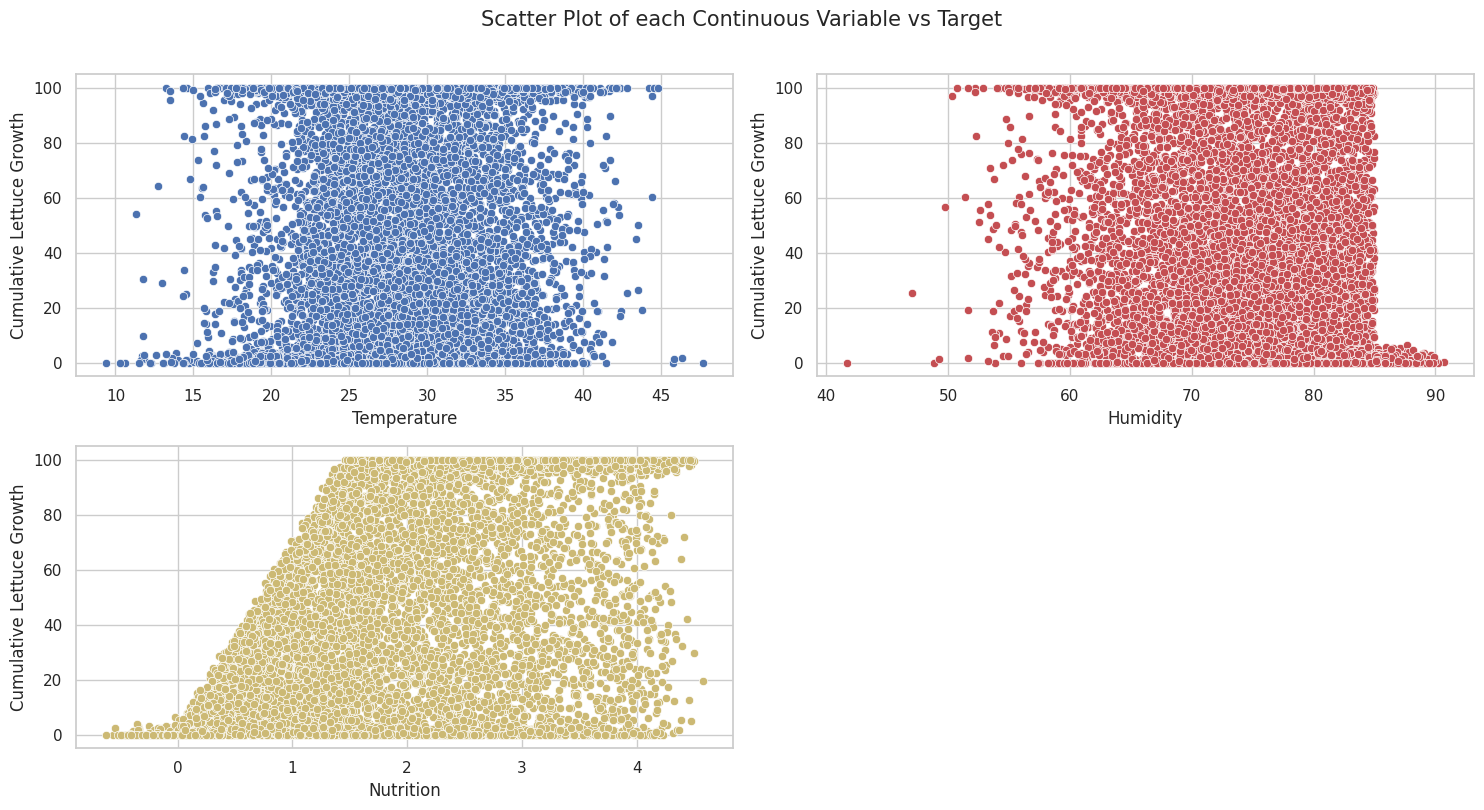

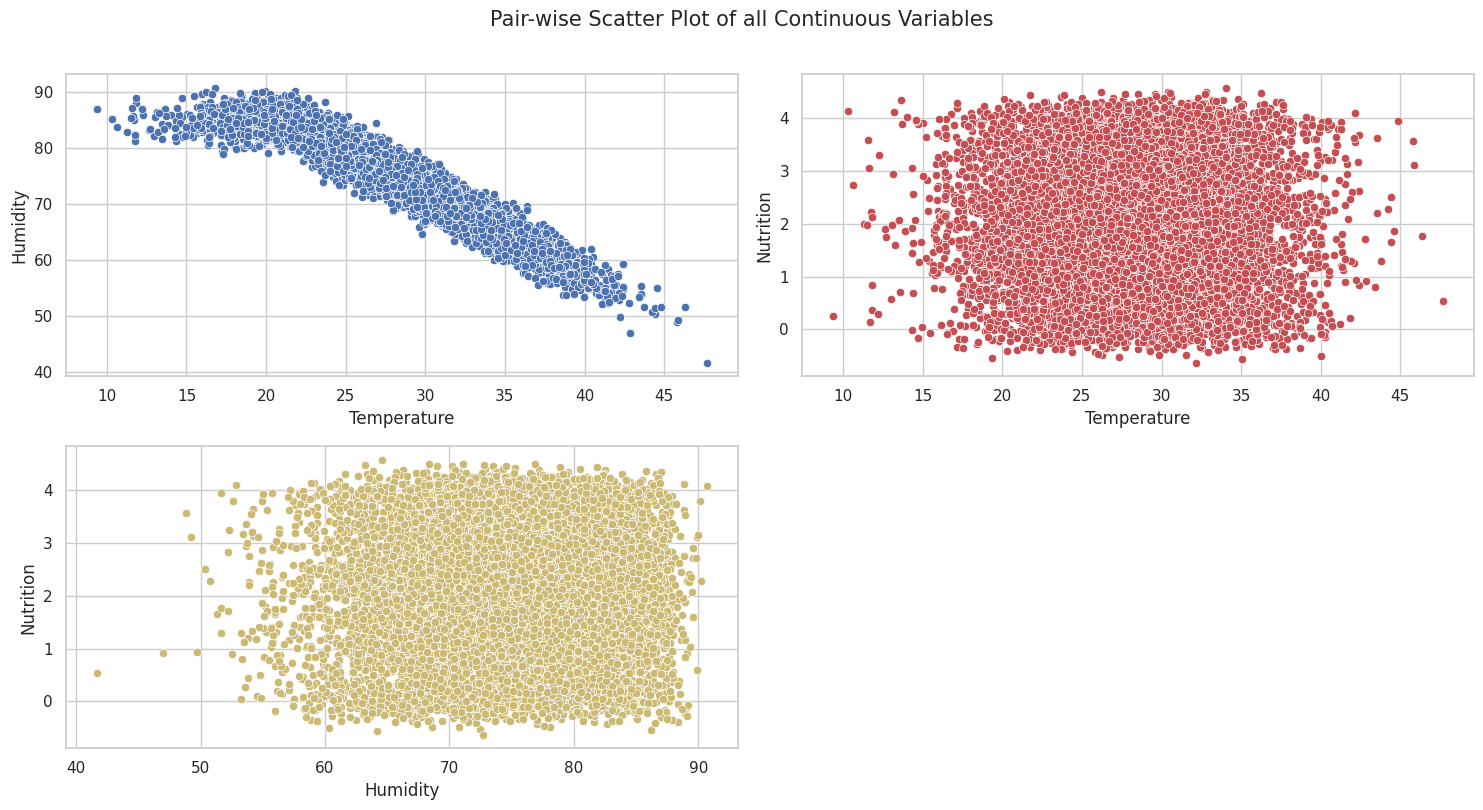

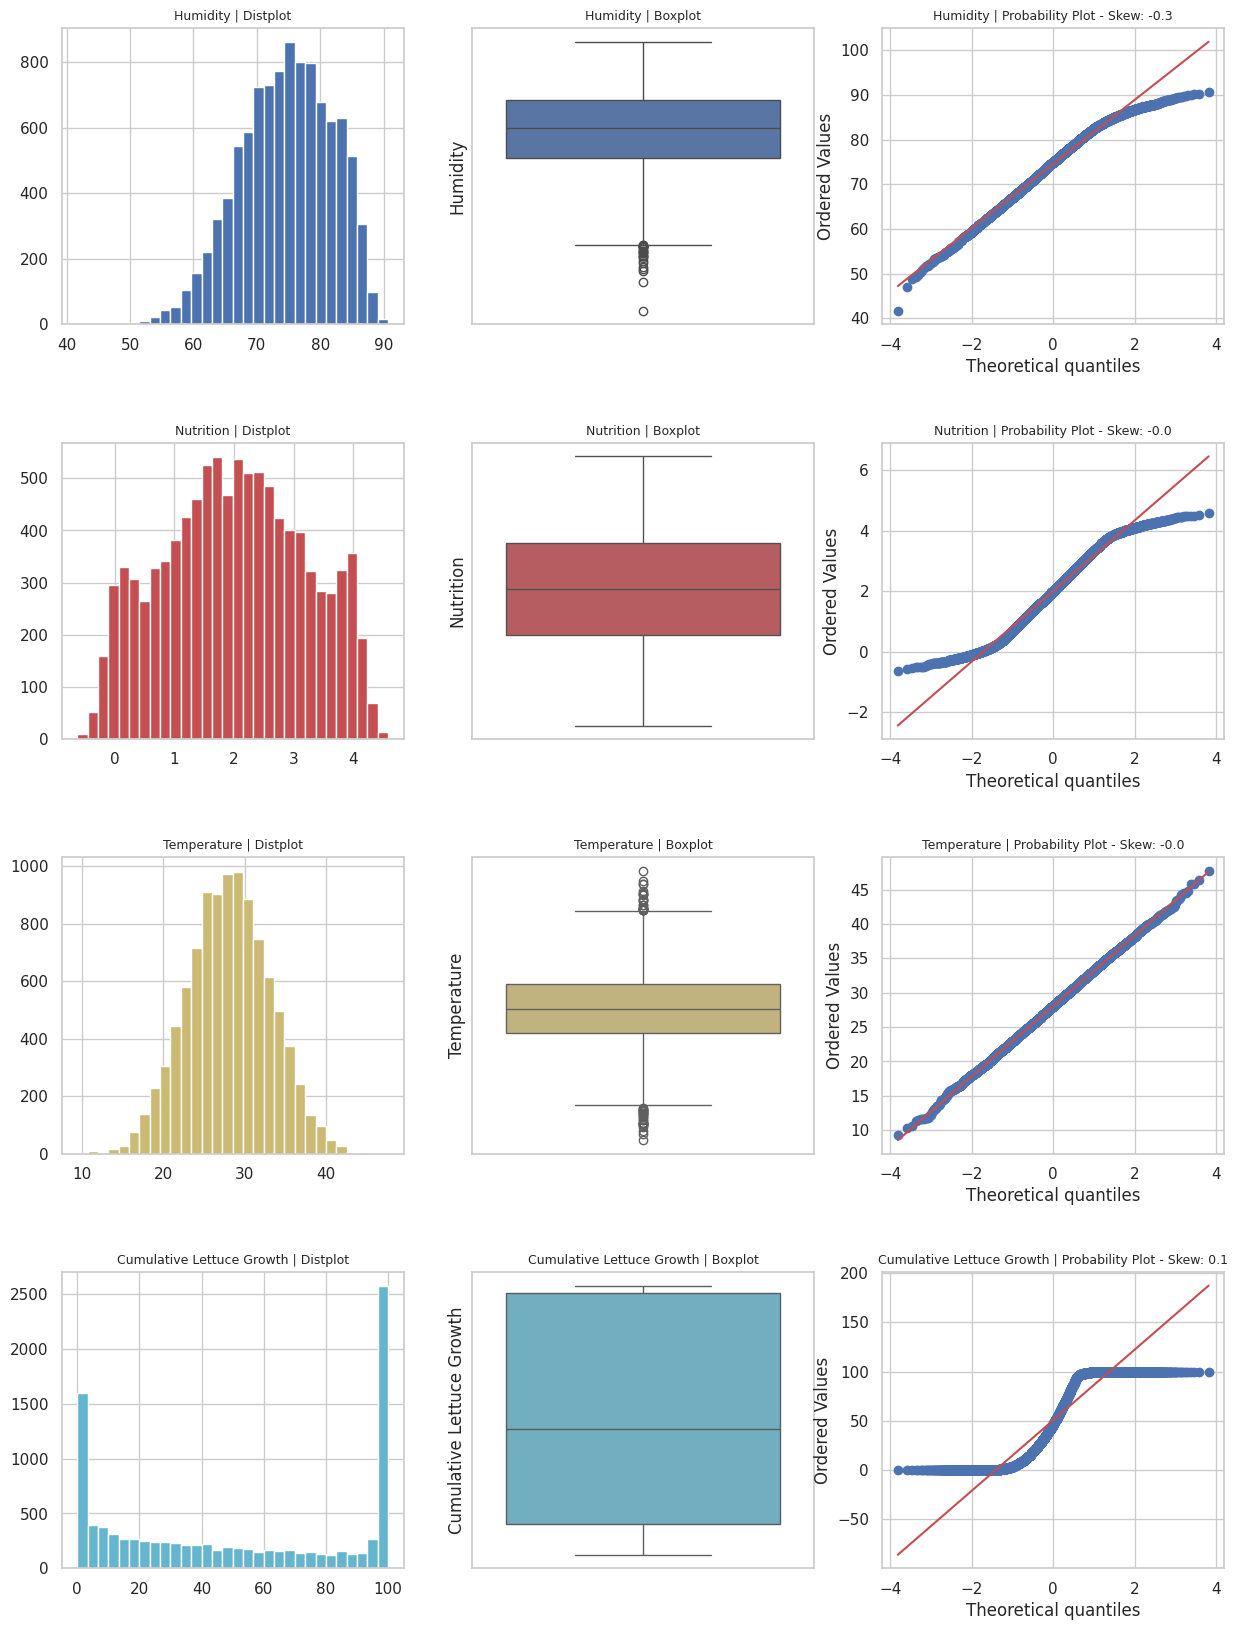

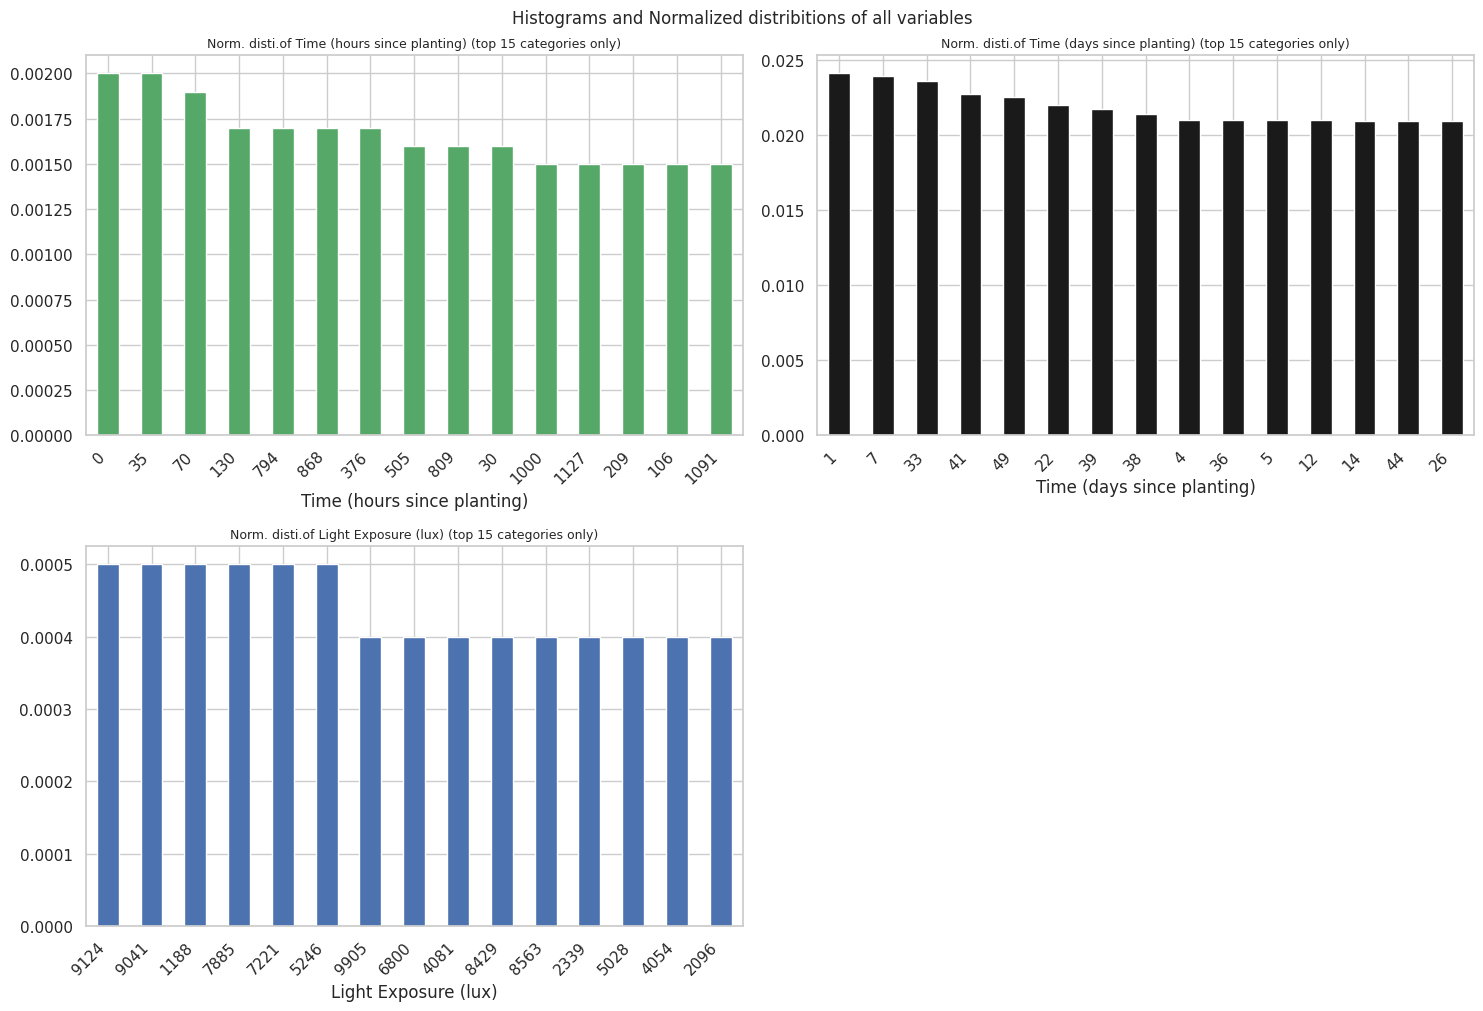

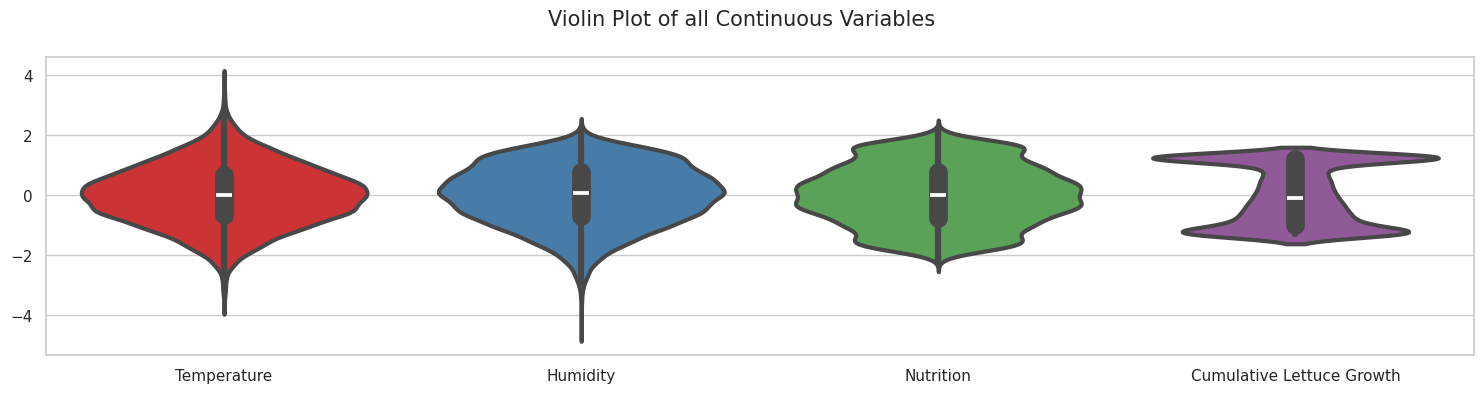

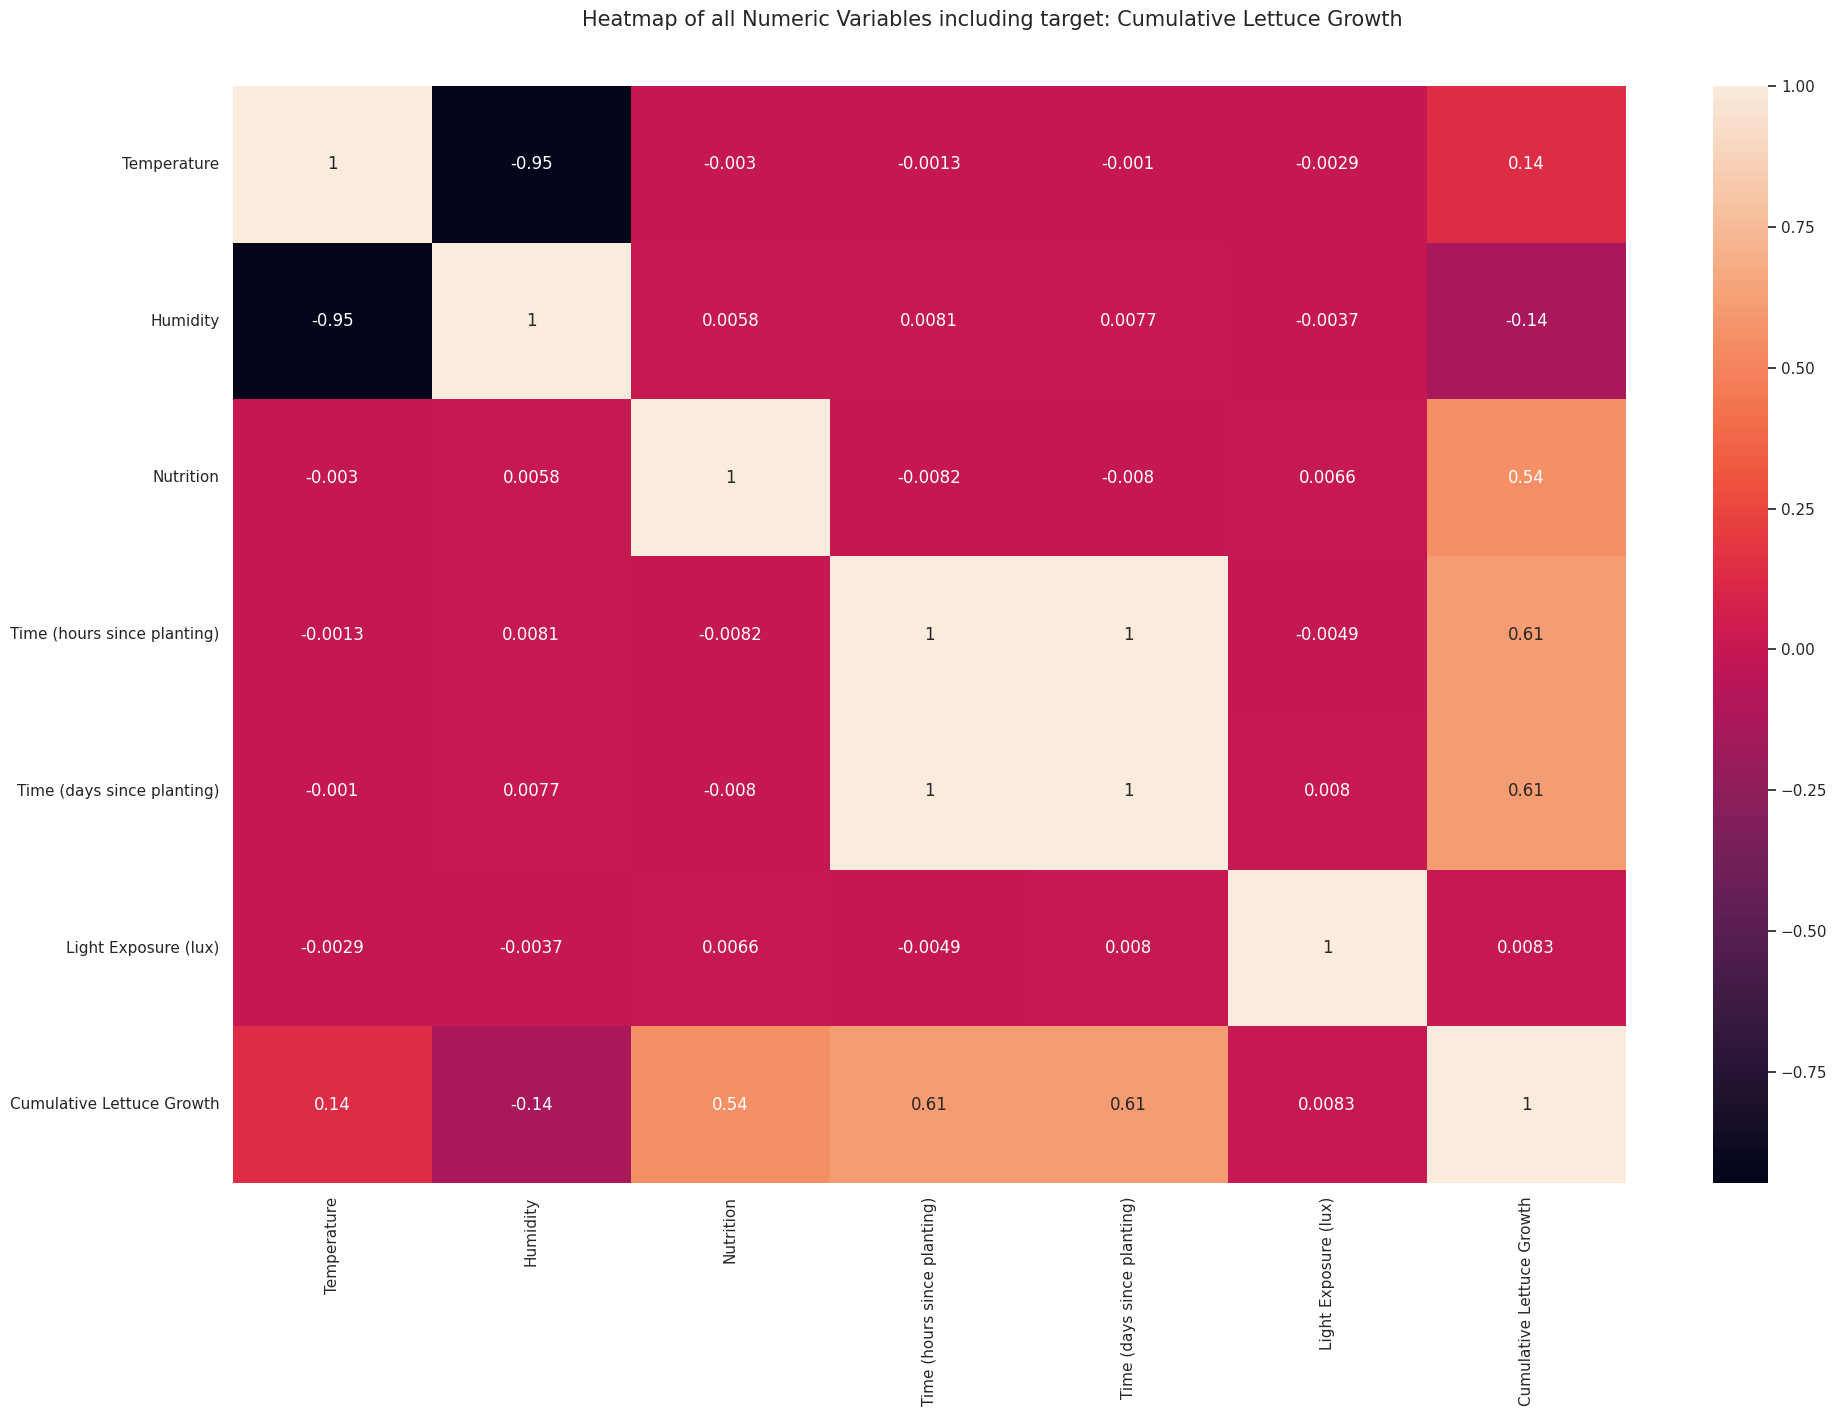

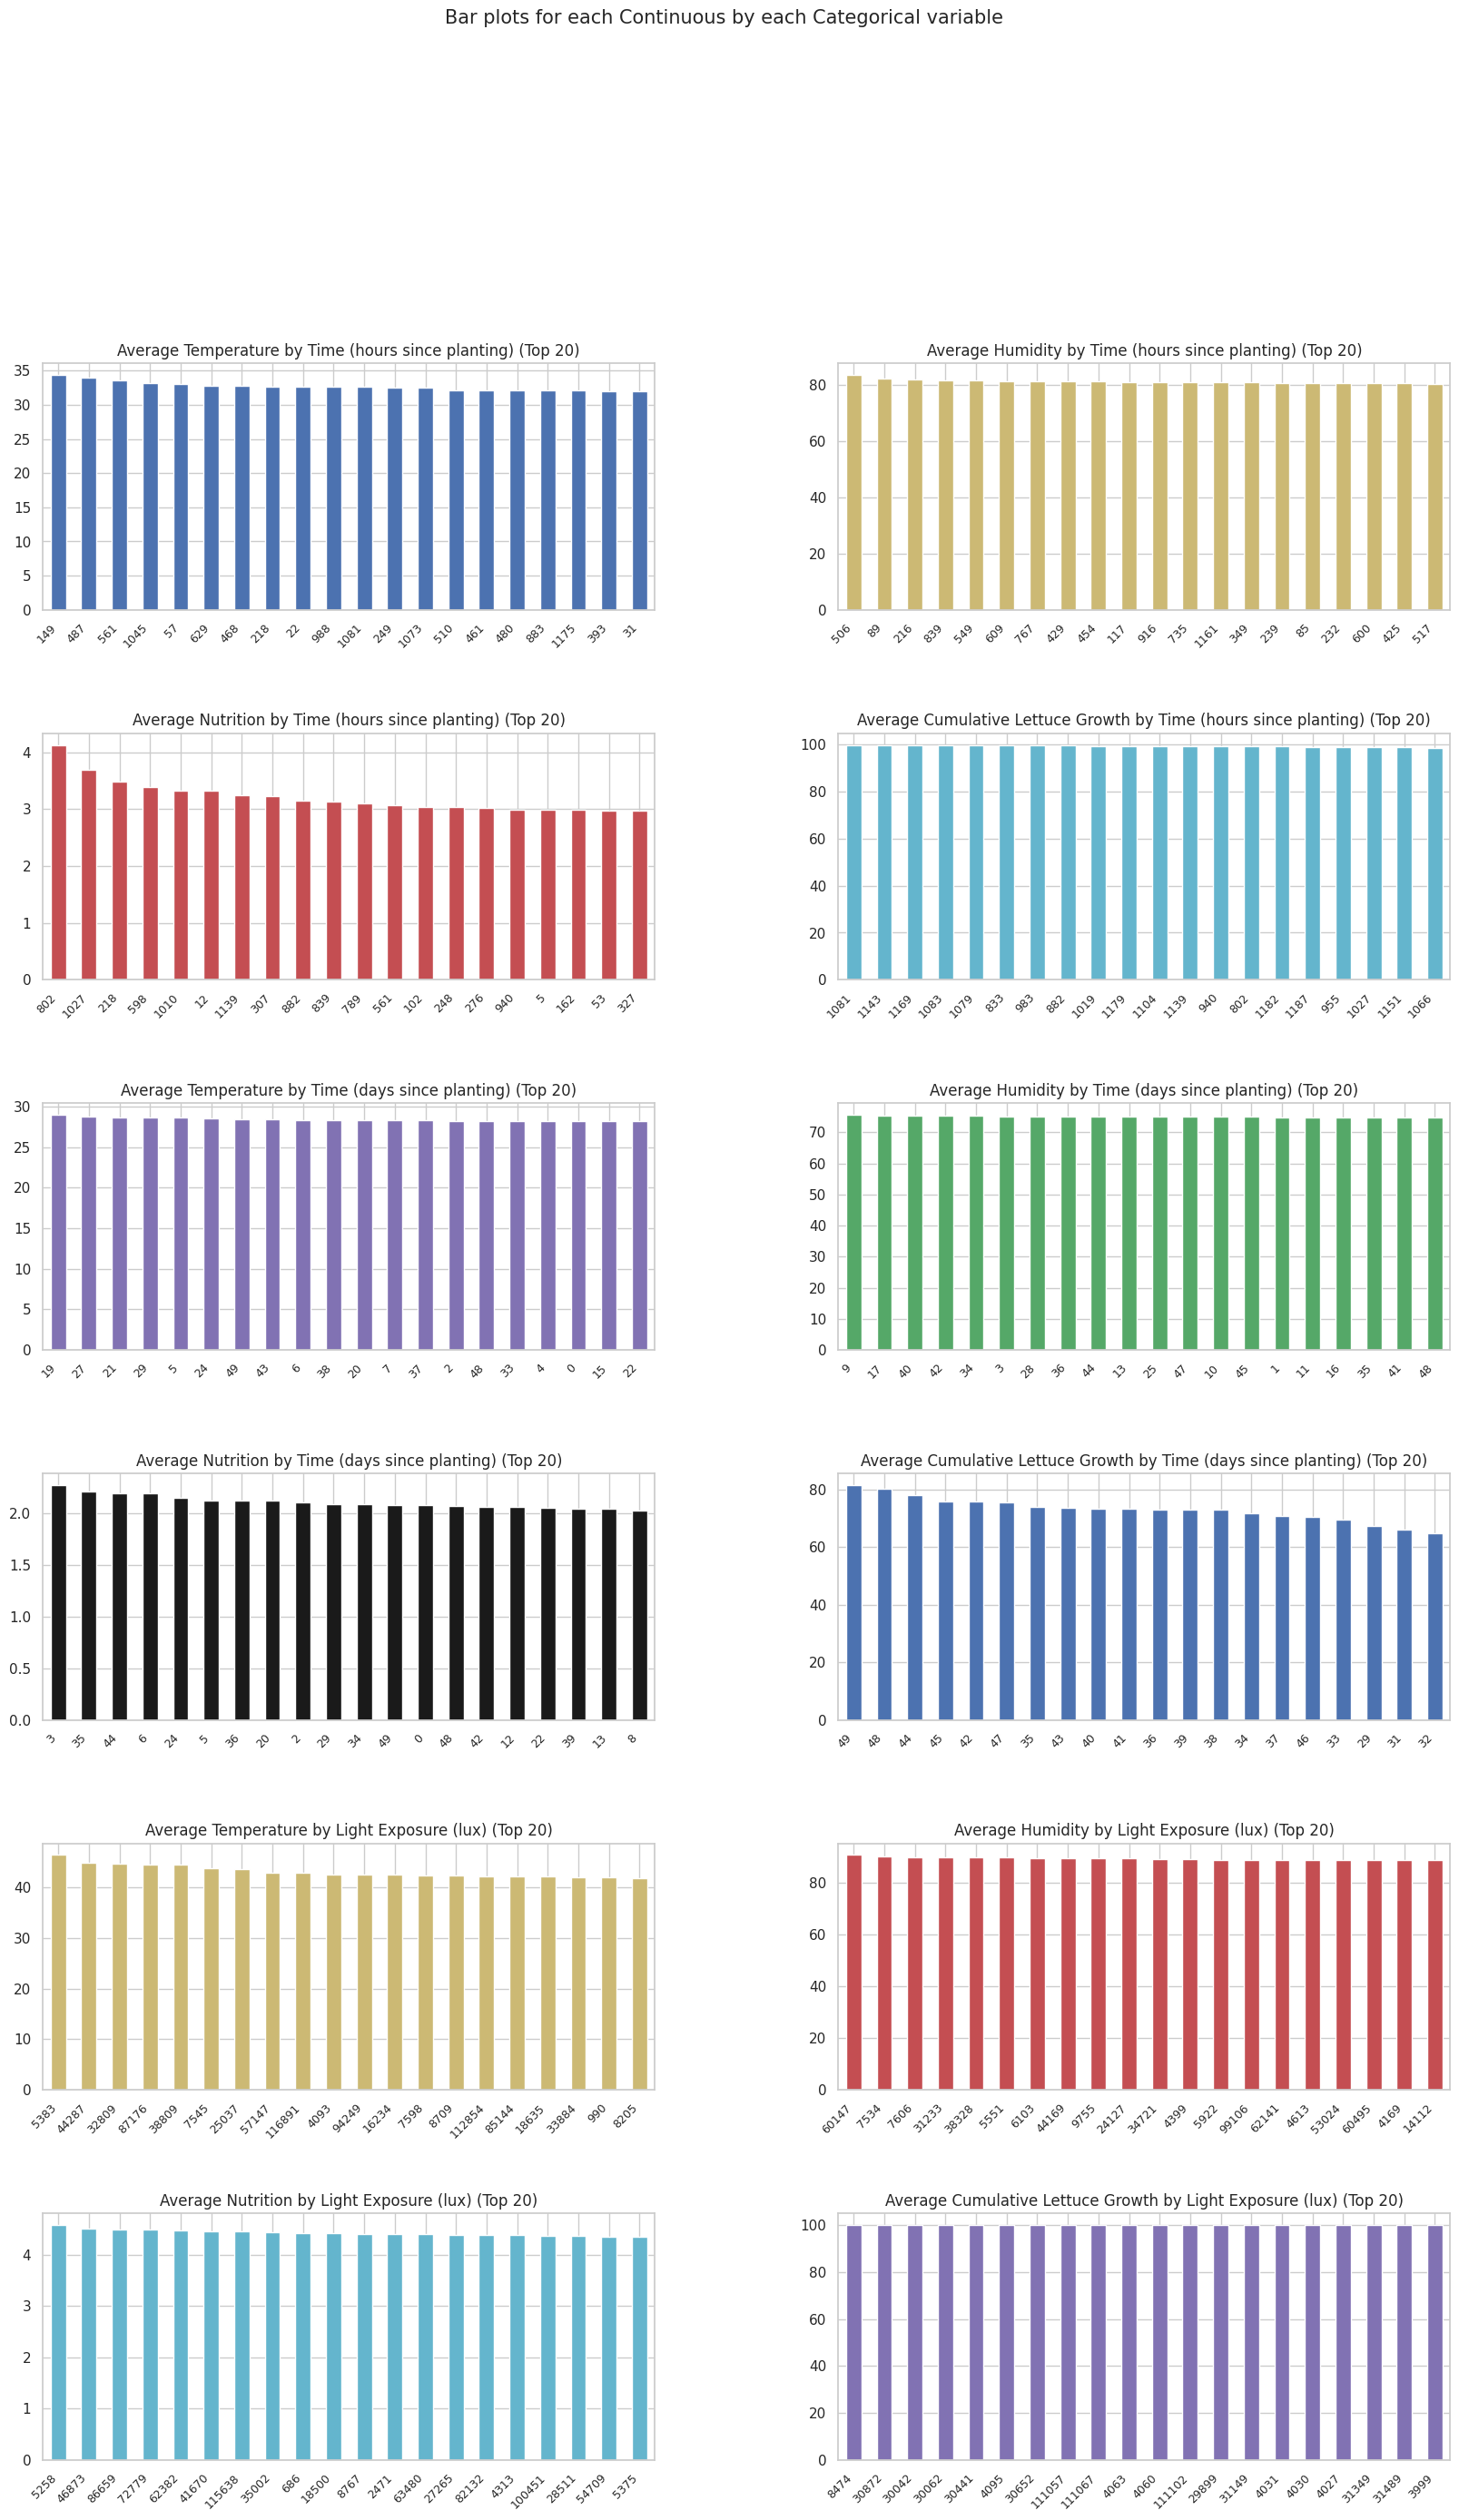

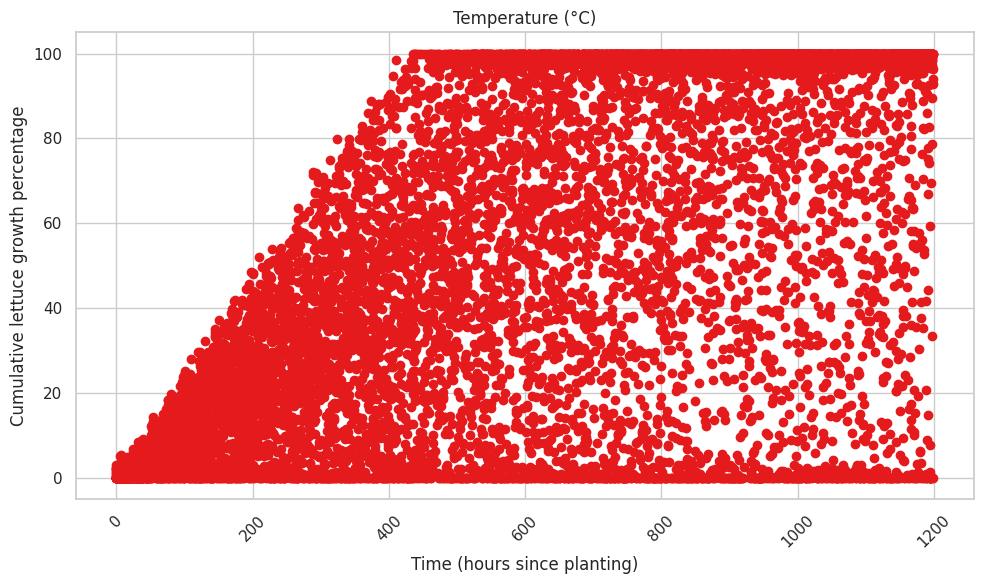

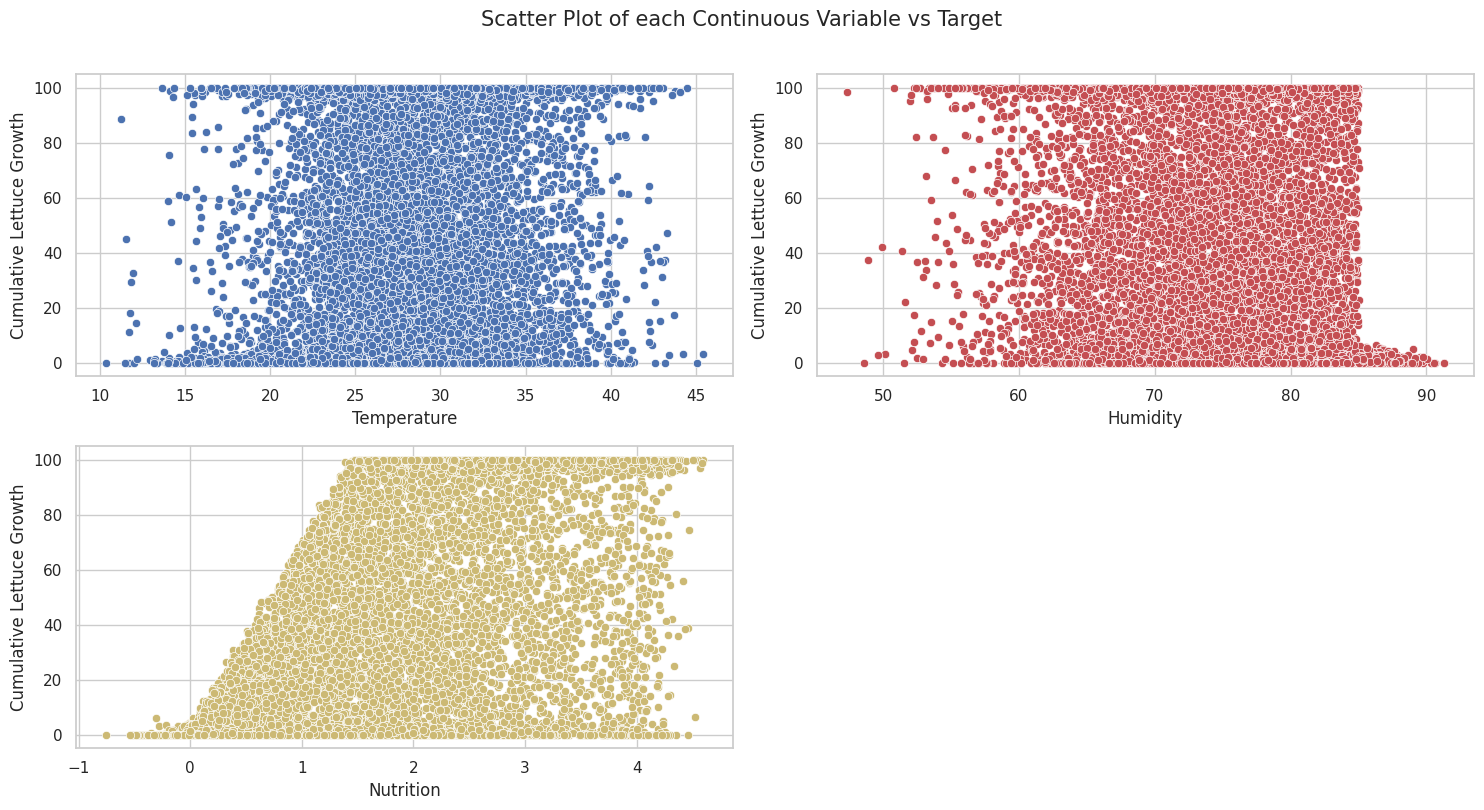

Number of All Scatter Plots = 6


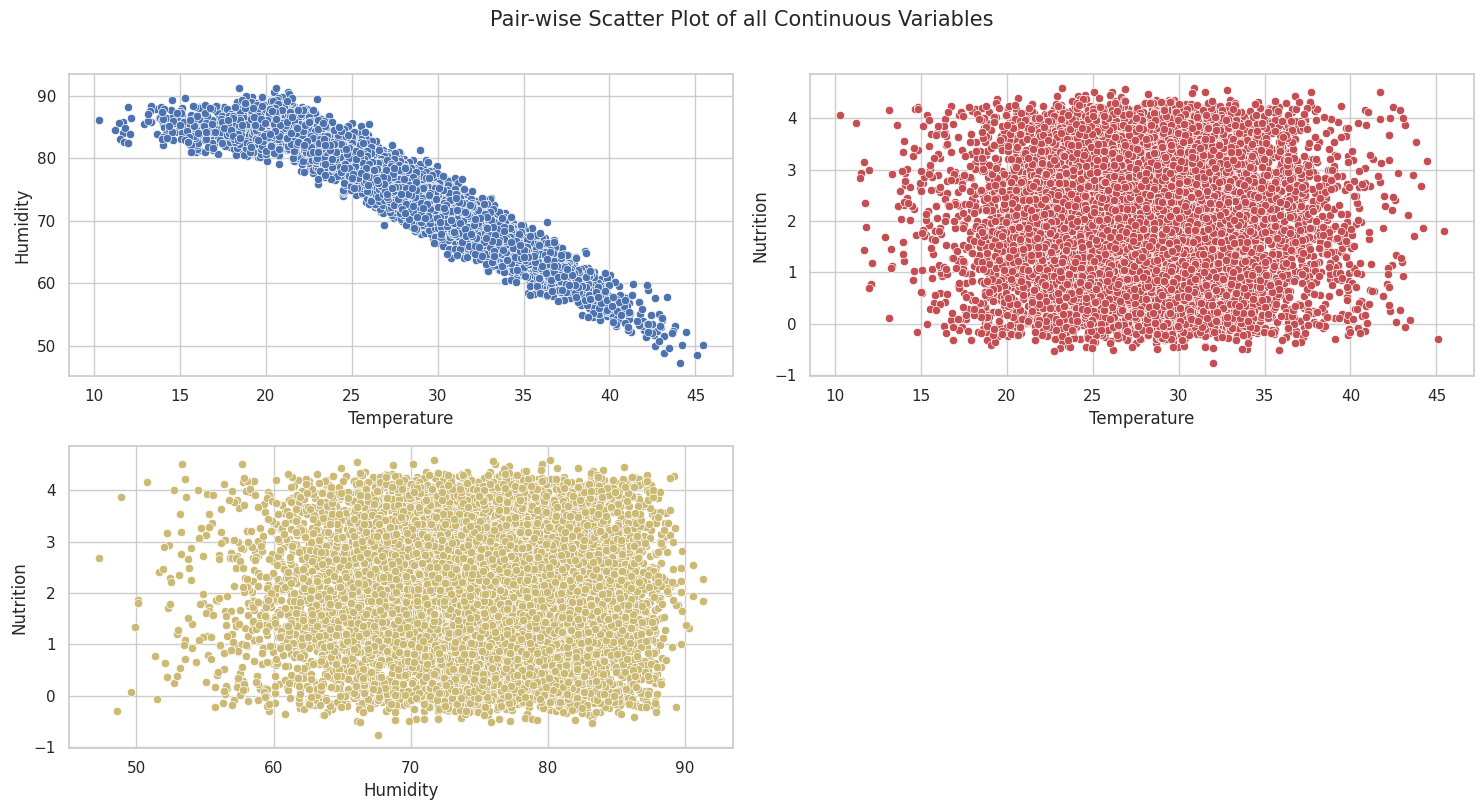

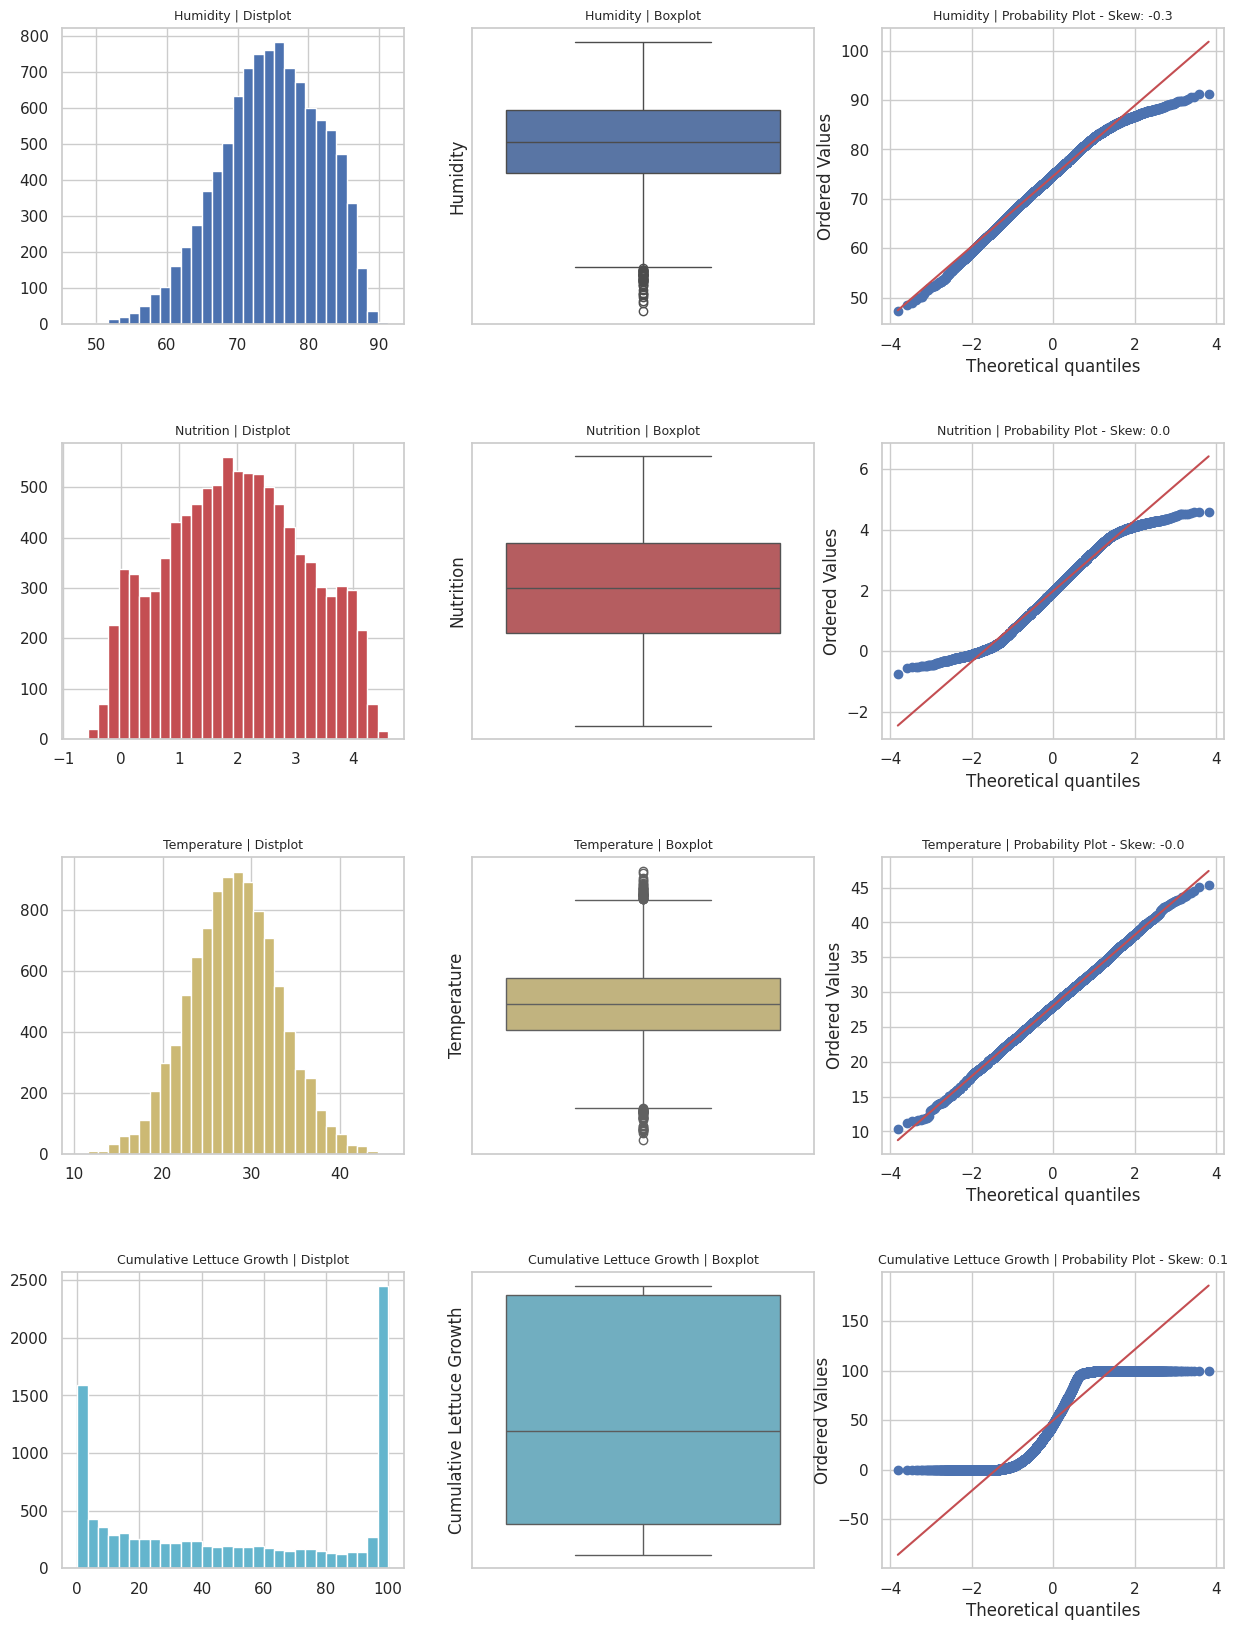

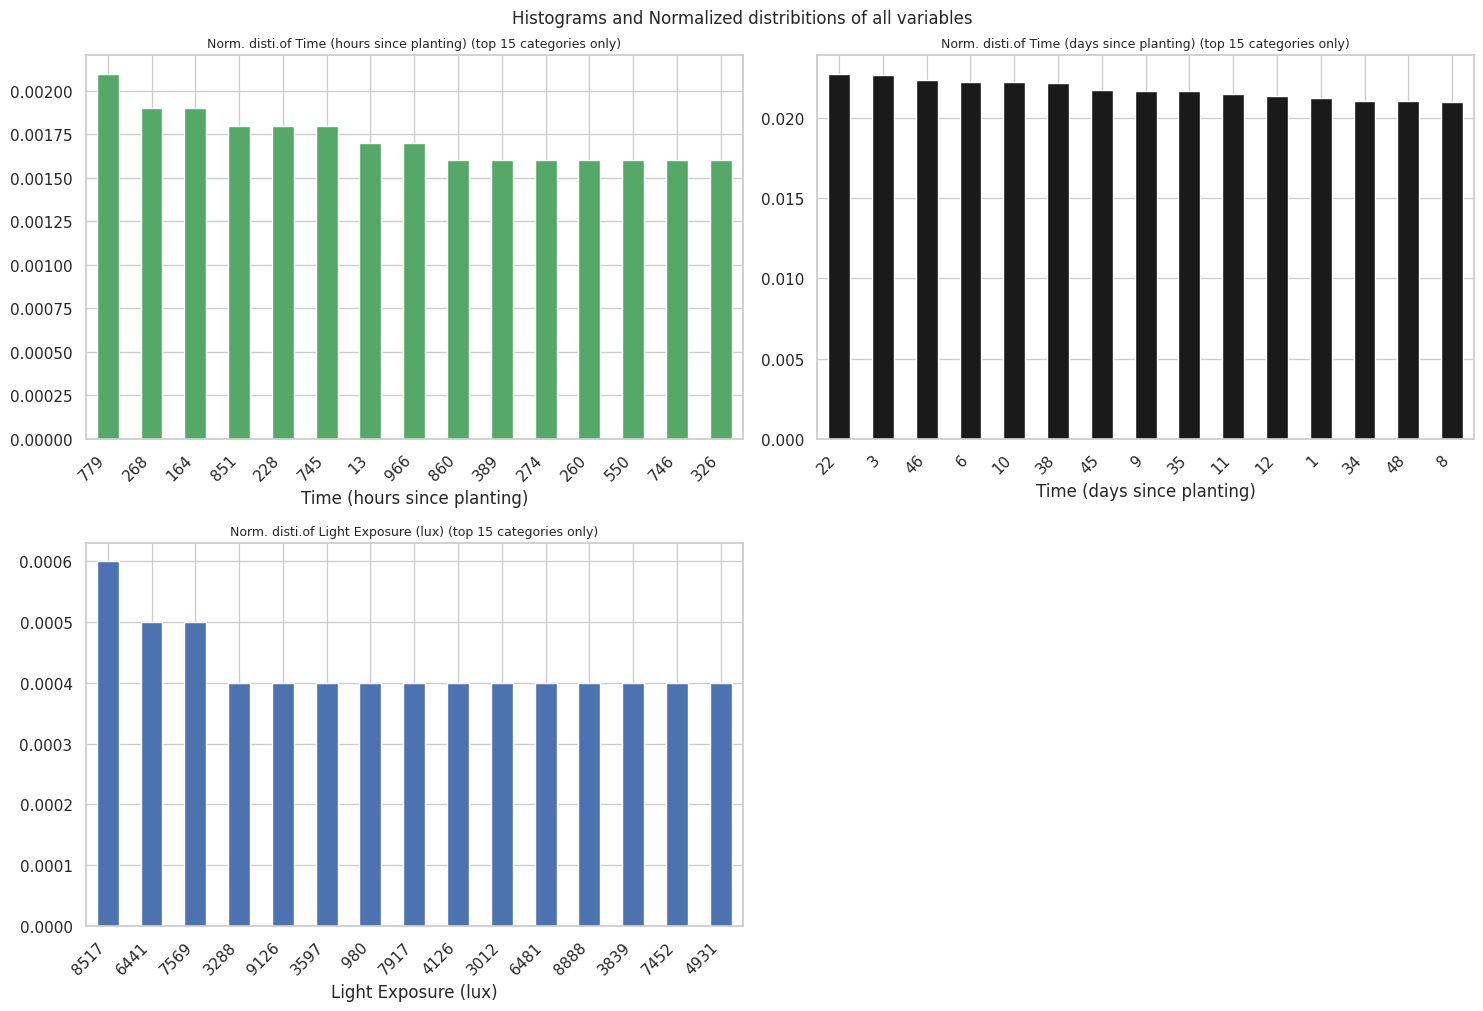

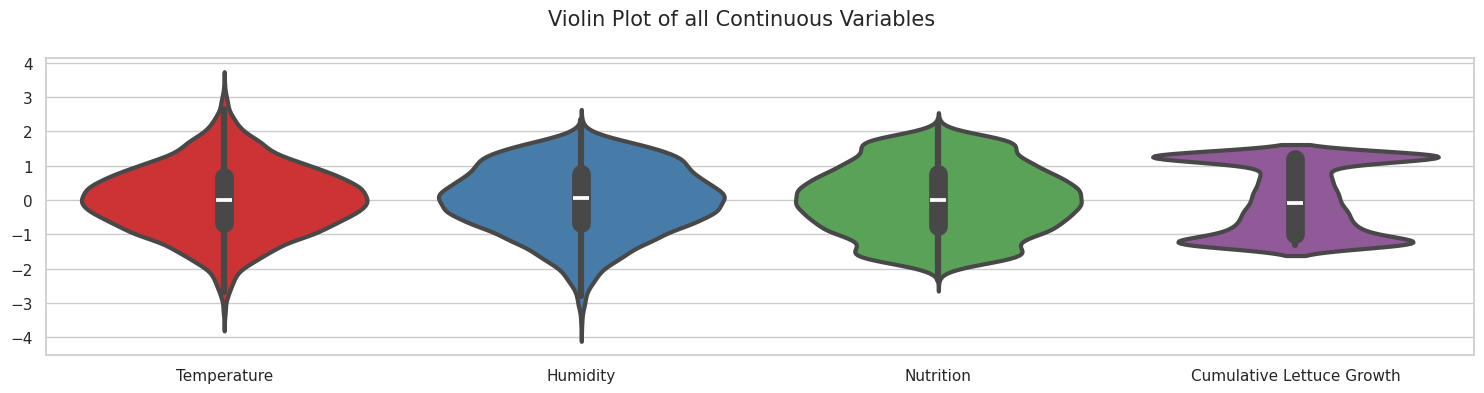

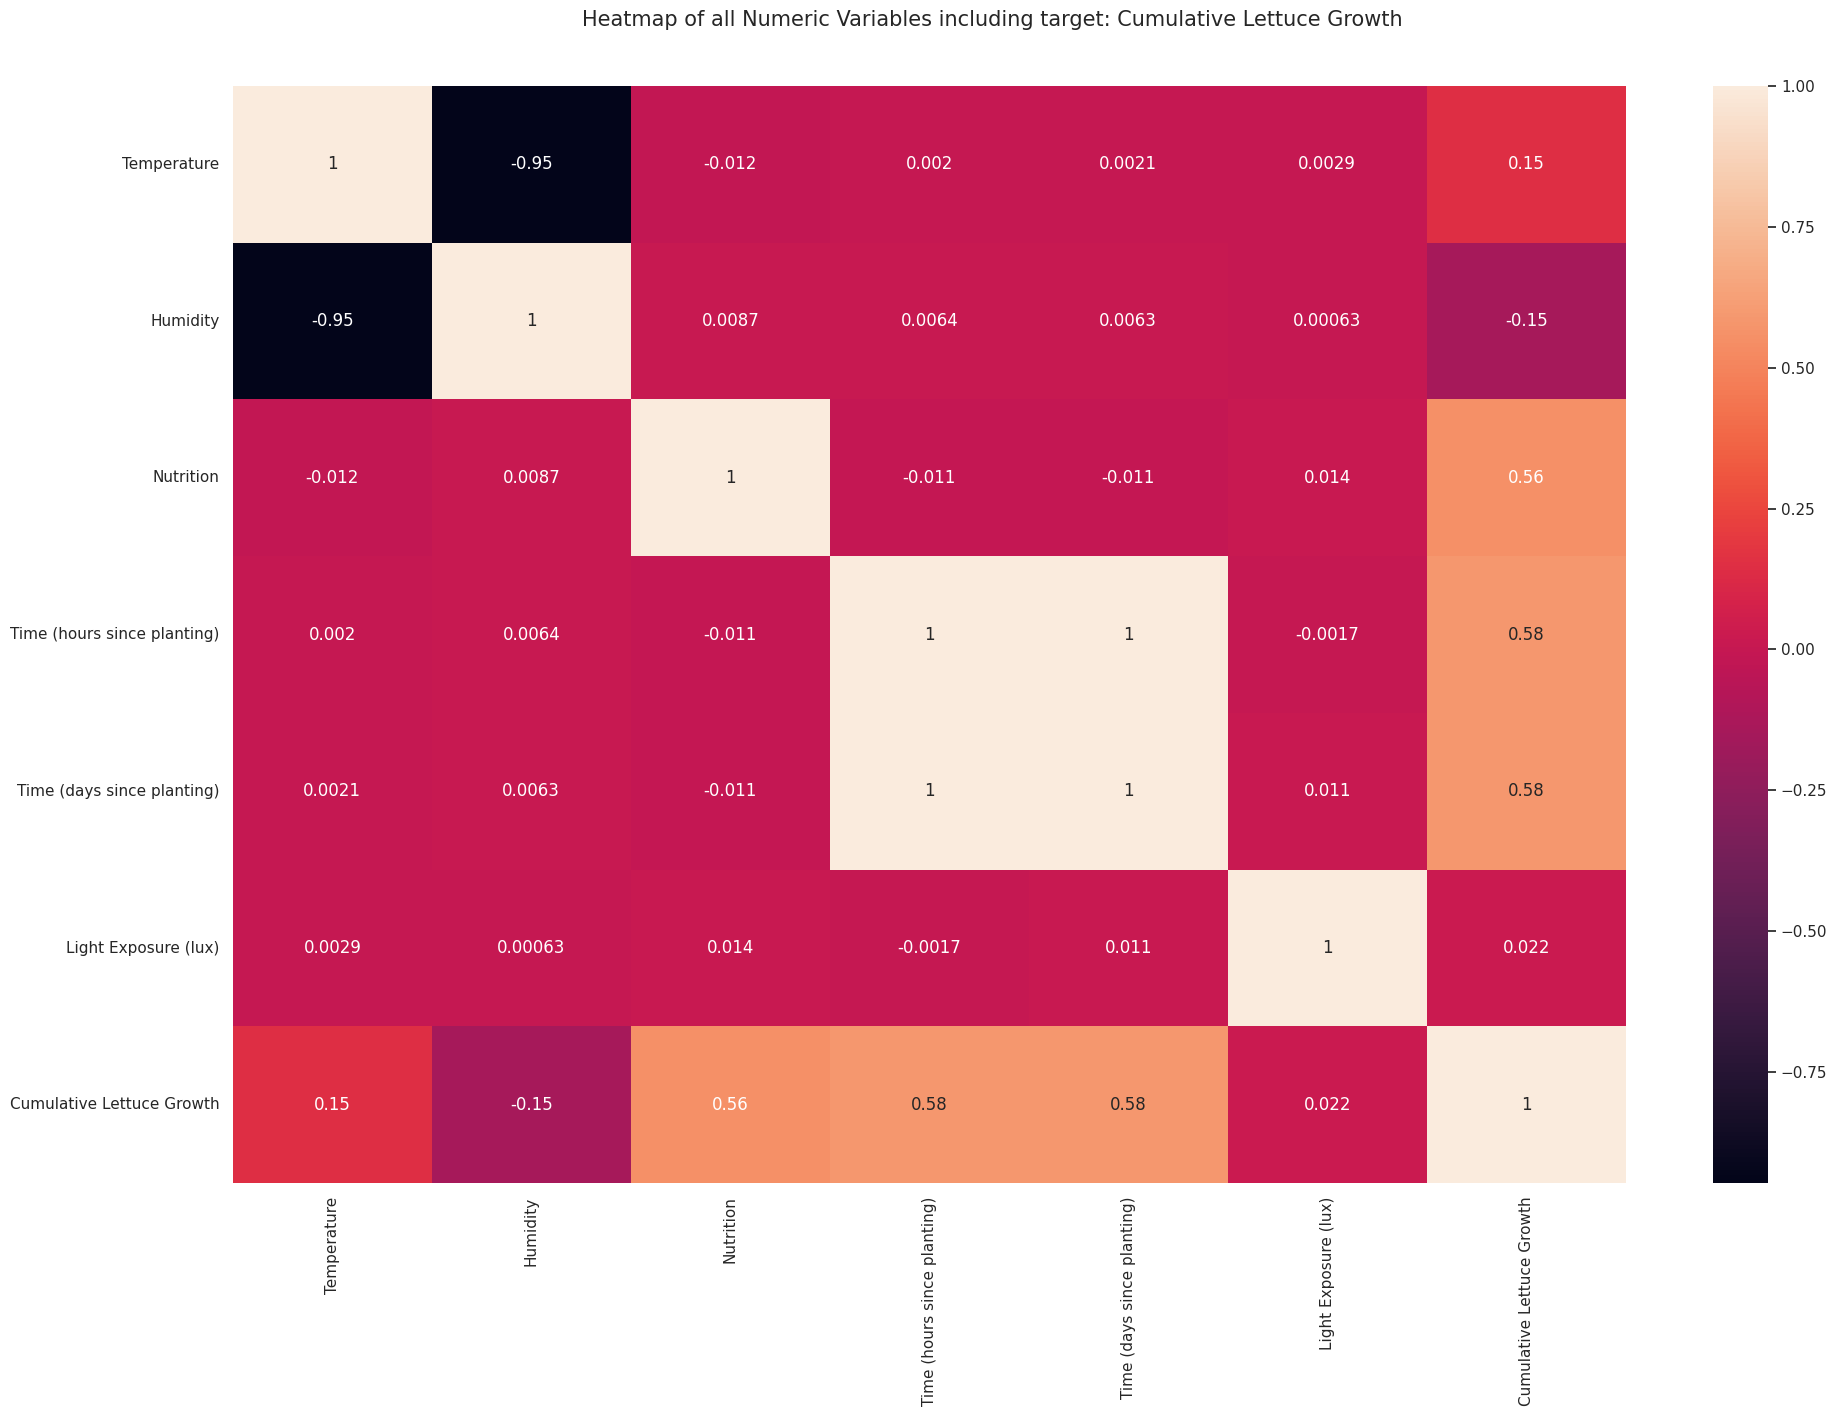

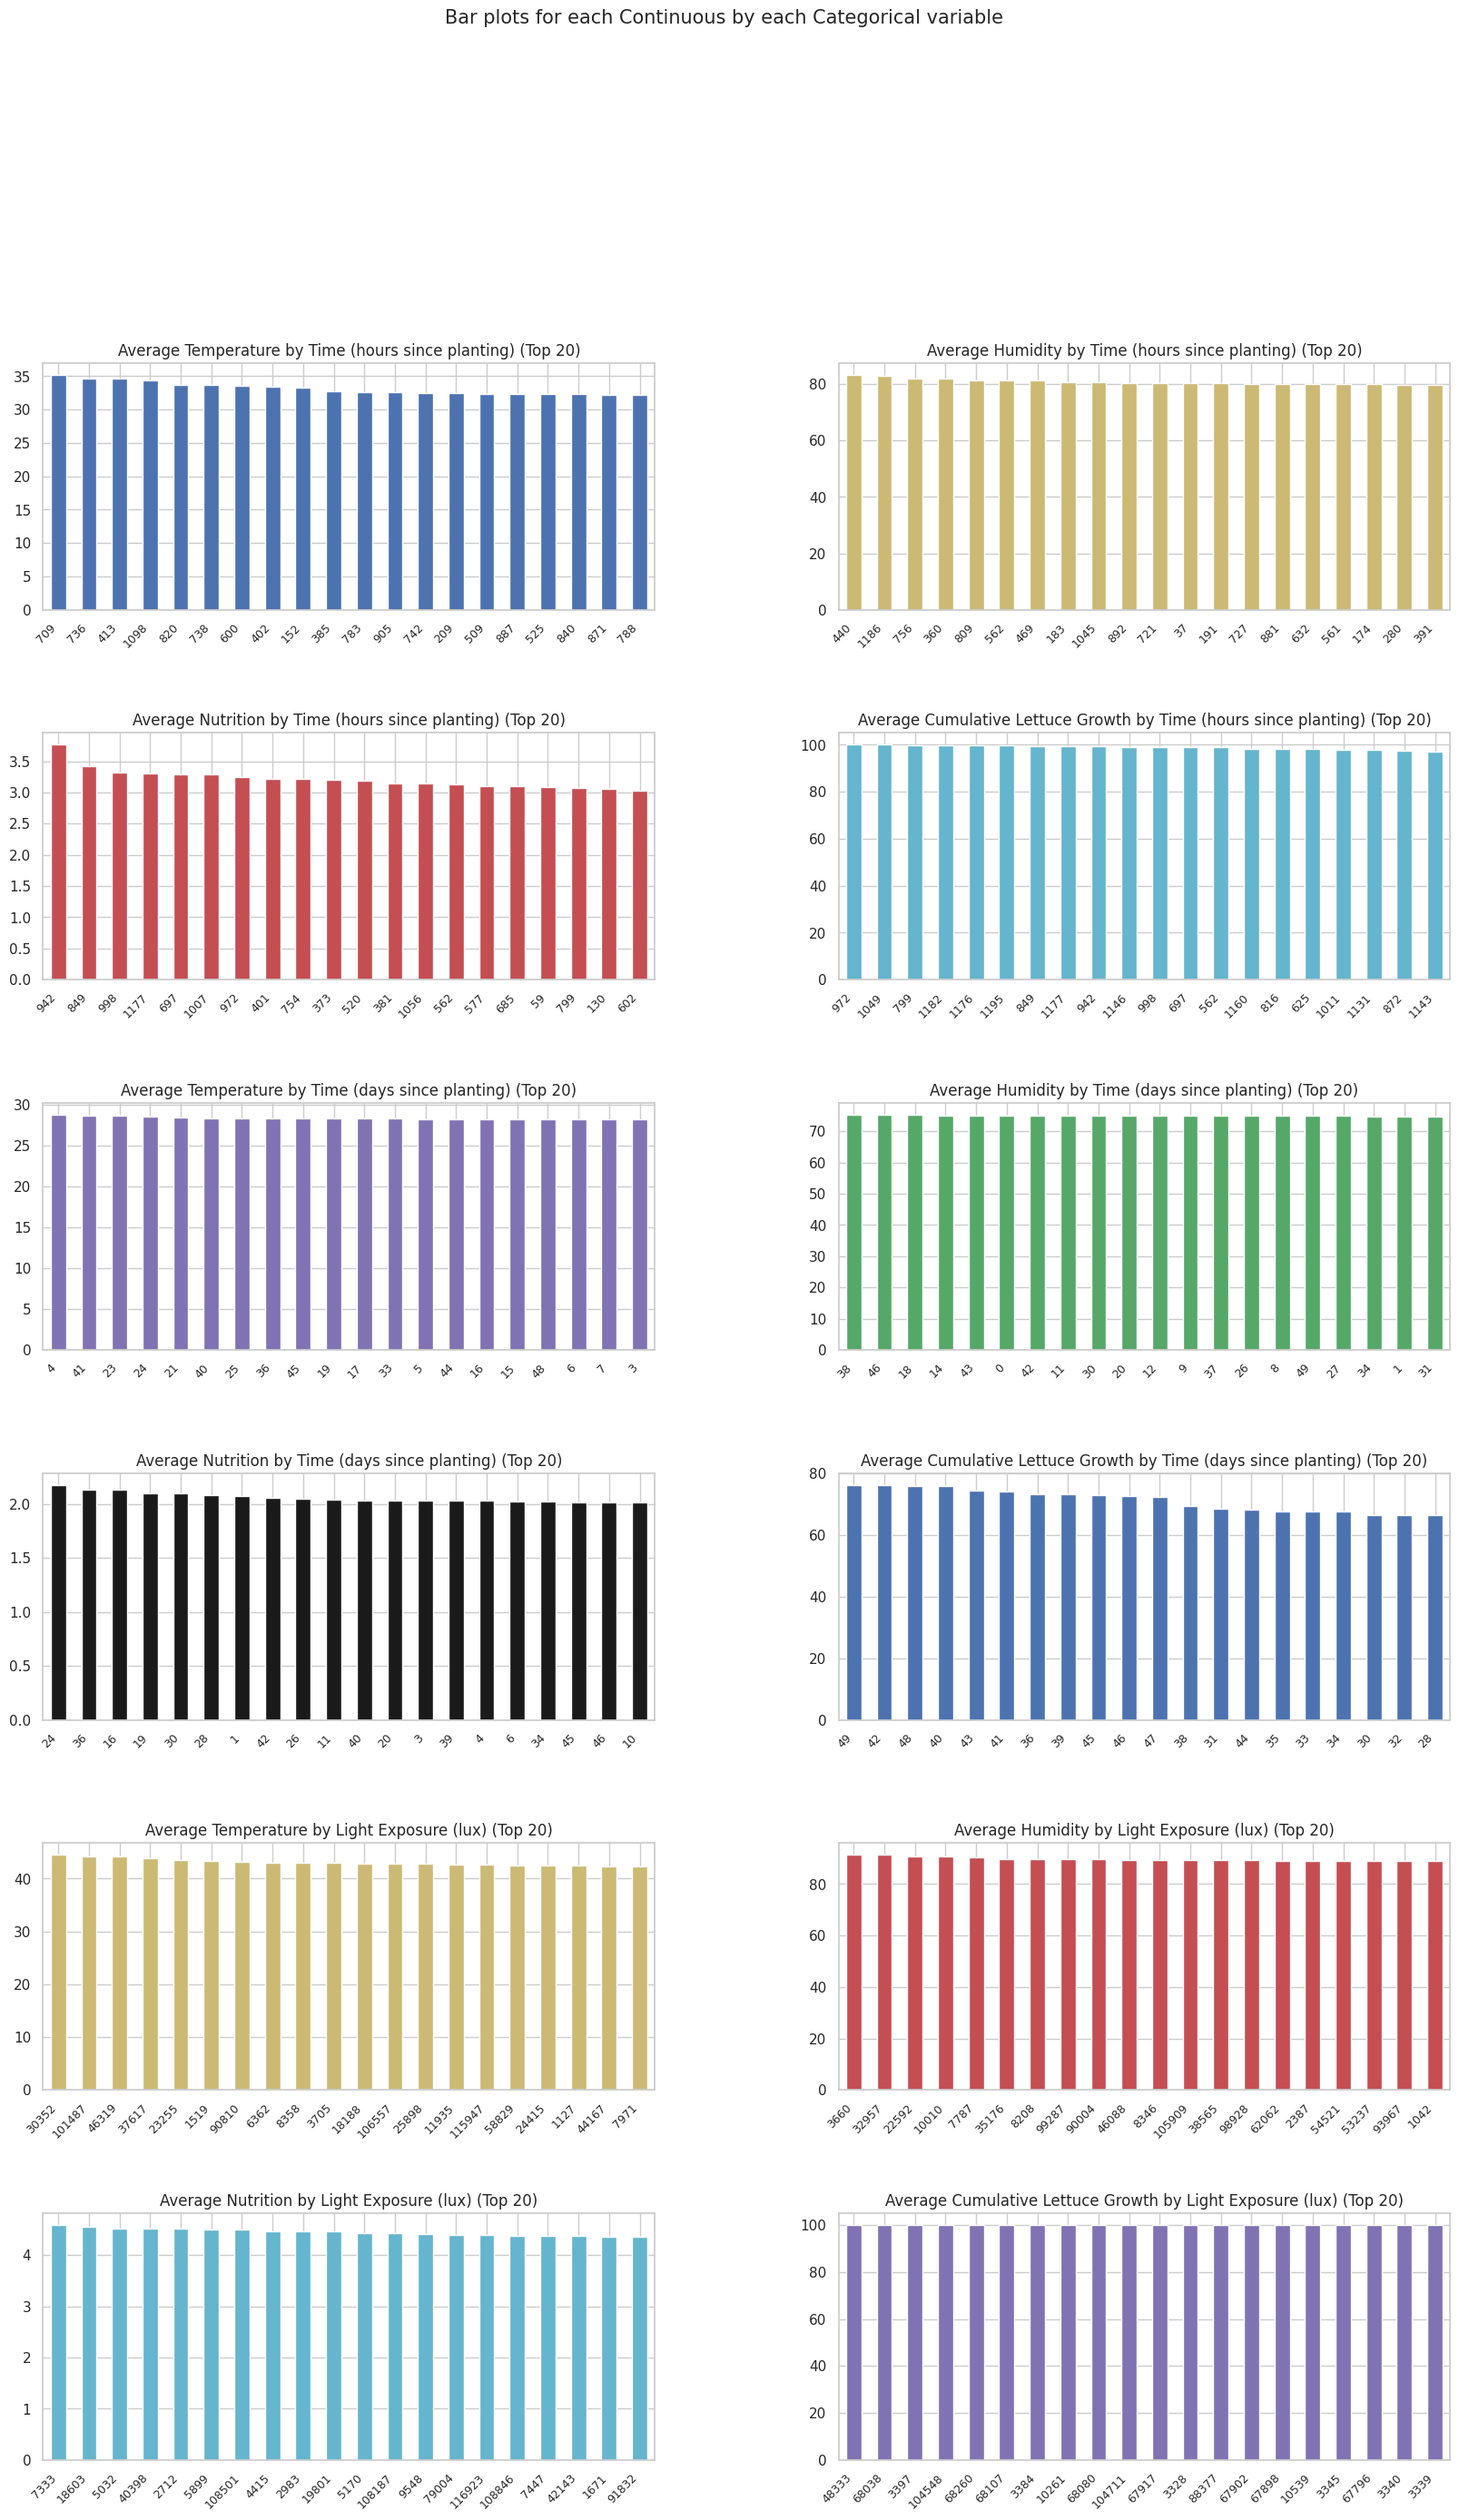

All Plots done
Time to run AutoViz = 17 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [16]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()
target_variable = 'Cumulative Lettuce Growth'
#dft = AV.AutoViz(BASE_DIR + '/fake_df.csv')
filename = BASE_DIR + '/synthetic_lettuce_growth_data.csv'
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [7]:
data = df.copy()

In [10]:
# Select the variables for the bar plot
x = data['Time (hours since planting)']
y = data['Cumulative Lettuce Growth']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
ax.scatter(x, y)

# Set the plot title and labels
ax.set_title('Temperature (°C)')
ax.set_xlabel('Time (hours since planting)')
ax.set_ylabel('Cumulative lettuce growth percentage')

# Rotate the x-tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Temperature (°C)')

Text(0.5, 0, 'Time (hours since planting)')

Text(0, 0.5, 'Cumulative lettuce growth percentage')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])